## Necessary Library Installations and Imports

Folktables - Python library that allows us to access US Census Datasets for different states that consists of mulltiple sensitive attributes. <br>
Polars - Python Data Manipulation and Handling library. Similar to Pandas

In [1]:
!pip install folktables

^C


  Using cached folktables-0.0.12-py3-none-any.whl.metadata (533 bytes)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 445.2 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 544.1 kB/s eta 0:00:00
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached folktables-0.0.12-py3-none-any.whl (17 kB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -- -------------------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install polars

  Using cached polars-1.24.0-cp39-abi3-win_amd64.whl.metadata (15 kB)
Using cached polars-1.24.0-cp39-abi3-win_amd64.whl (34.7 MB)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import folktables
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from folktables import ACSDataSource, ACSIncome, ACSPublicCoverage, generate_categories

### Data Visualisation

Downloading in the following code takes longer to run, hence, ran once and commented out.

In [3]:
data_source = ACSDataSource(survey_year='2018', horizon='1-Year', survey='person')
# ca_data = data_source.get_data(states=["CA","MA","TX", "NY", "GA"], download=True)

In [4]:
# print(list(ca_data.head().columns))

In [4]:
# ca_features, ca_labels, _ = ACSPublicCoverage.df_to_pandas(ca_data)
# ca_features.to_csv('data/multi_state_features.csv', index=False)
# ca_labels.to_csv('data/multi_state_labels.csv', index=False)

# Commented because already ran once and saved the CSV files

In [5]:
definition_df = data_source.get_definitions(download=True)
categories = generate_categories(features=ACSPublicCoverage.features, definition_df=definition_df)

In [6]:
categories.keys()

dict_keys(['SCHL', 'MAR', 'SEX', 'DIS', 'ESP', 'CIT', 'MIG', 'MIL', 'ANC', 'NATIVITY', 'DEAR', 'DEYE', 'DREM', 'ESR', 'ST', 'FER', 'RAC1P'])

In [7]:
features = pl.read_csv('data/multi_state_features.csv')
labels = pl.read_csv("data/multi_state_labels.csv")

In [8]:
features.shape,labels.shape

((364726, 19), (364726, 1))

In [9]:
features.describe()

statistic,AGEP,SCHL,MAR,SEX,DIS,ESP,CIT,MIG,MIL,ANC,NATIVITY,DEAR,DEYE,DREM,PINCP,ESR,ST,FER,RAC1P
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0,364726.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",35.933569,16.554655,3.346452,1.565156,1.865258,0.300036,1.89032,1.325938,3.658231,1.76107,1.239635,1.980813,1.9744,1.931077,9577.727653,3.353663,24.817581,0.80549,2.630556
"""std""",15.550484,4.126389,1.864167,0.495737,0.341449,1.217979,1.550974,0.731327,1.067738,1.129982,0.426861,0.137182,0.157939,0.253323,9969.563992,2.455723,17.82939,0.970503,2.692612
"""min""",15.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-8300.0,0.0,6.0,0.0,1.0
"""25%""",21.0,15.0,1.0,1.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,6.0,0.0,1.0
"""50%""",33.0,17.0,5.0,2.0,2.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,6600.0,3.0,25.0,0.0,1.0
"""75%""",50.0,19.0,5.0,2.0,2.0,0.0,3.0,1.0,4.0,2.0,1.0,2.0,2.0,2.0,18000.0,6.0,48.0,2.0,2.0
"""max""",64.0,24.0,5.0,2.0,2.0,8.0,5.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,30000.0,6.0,48.0,2.0,9.0


In [10]:
column_details = {}
for col in features.columns:
    print(col,"---",definition_df[definition_df[1]==col].values[0][4])
    d  = {}
    d['Definition'] = definition_df[definition_df[1]==col].values[0][4]
    d['Possible Values'] = [col[6] for col in (definition_df[definition_df[1]==col].values.tolist()[1:])]
    column_details[col]=d    


AGEP --- Age
SCHL --- Educational attainment
MAR --- Marital status
SEX --- Sex
DIS --- Disability recode
ESP --- Employment status of parents
CIT --- Citizenship status
MIG --- Mobility status (lived here 1 year ago)
MIL --- Military service
ANC --- Ancestry recode
NATIVITY --- Nativity
DEAR --- Hearing difficulty
DEYE --- Vision difficulty
DREM --- Cognitive difficulty
PINCP --- Total person's income (signed, use ADJINC to adjust to constant dollars)
ESR --- Employment status recode
ST --- State Code based on 2010 Census definitions
FER --- Gave birth to child within the past 12 months
RAC1P --- Recoded detailed race code


In [11]:
column_details['RAC1P']

{'Definition': 'Recoded detailed race code',
 'Possible Values': ['White alone',
  'Black or African American alone',
  'American Indian alone',
  'Alaska Native alone',
  'American Indian and Alaska Native tribes specified; or American Indian or Alaska Native, not specified and no other races',
  'Asian alone',
  'Native Hawaiian and Other Pacific Islander alone',
  'Some Other Race alone',
  'Two or More Races']}

In [12]:
import matplotlib.colors as mcolors
colors = np.random.choice(list(mcolors.CSS4_COLORS.keys()),size=19)
colors

array(['cornflowerblue', 'lawngreen', 'lightslategrey', 'mediumseagreen',
       'lightcyan', 'bisque', 'lightgrey', 'darkorange', 'deepskyblue',
       'dimgrey', 'burlywood', 'purple', 'seagreen', 'darkgrey', 'linen',
       'saddlebrown', 'palevioletred', 'darkgreen', 'mediumspringgreen'],
      dtype='<U20')

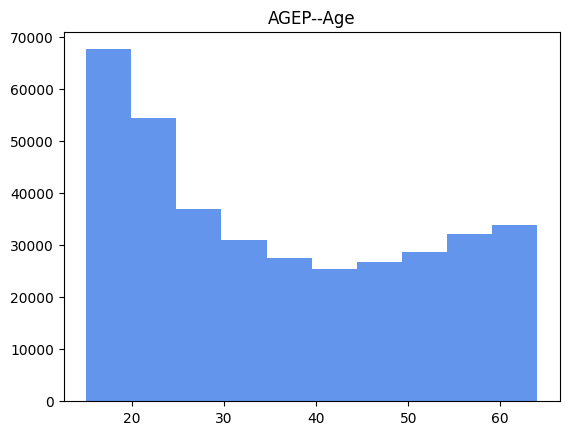

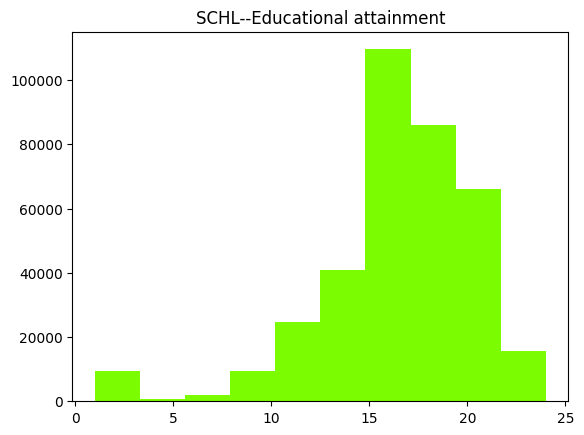

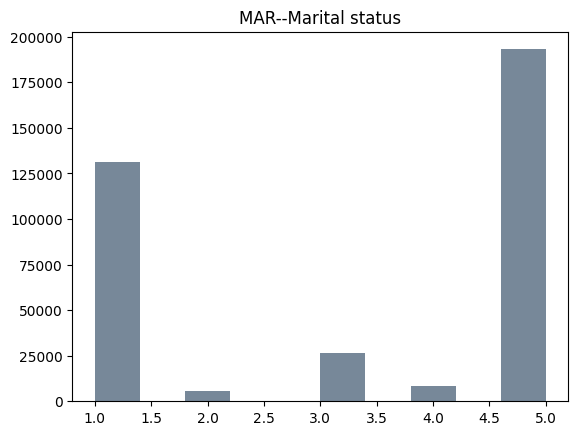

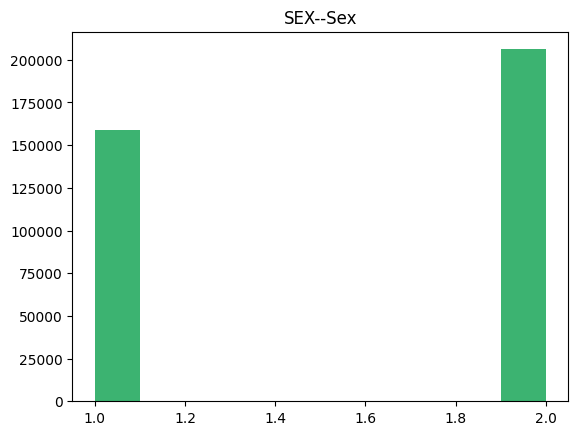

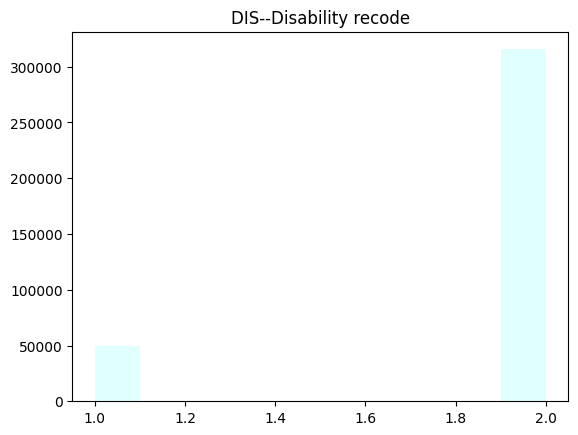

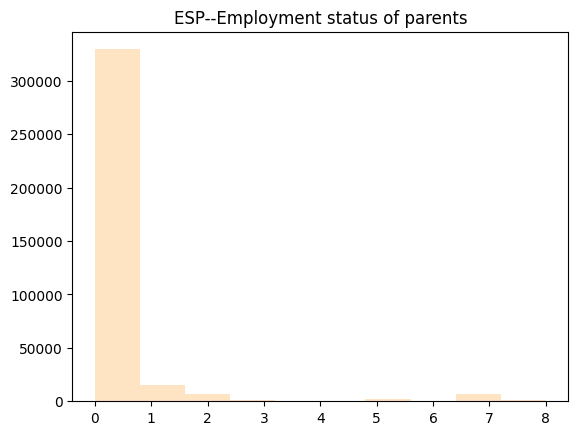

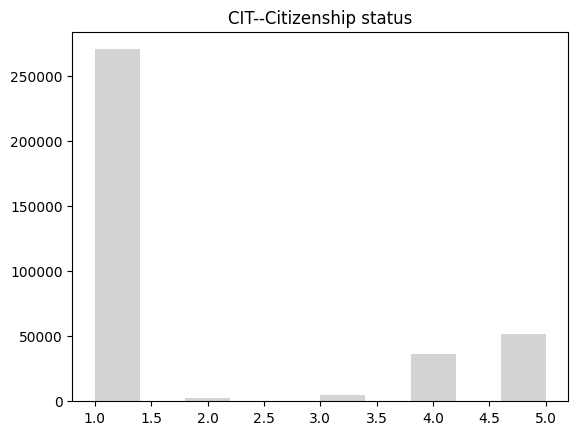

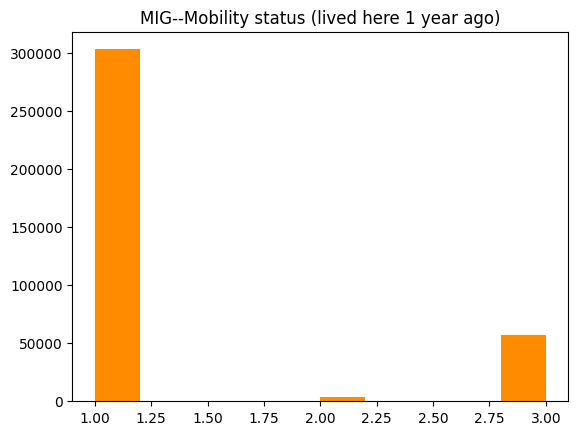

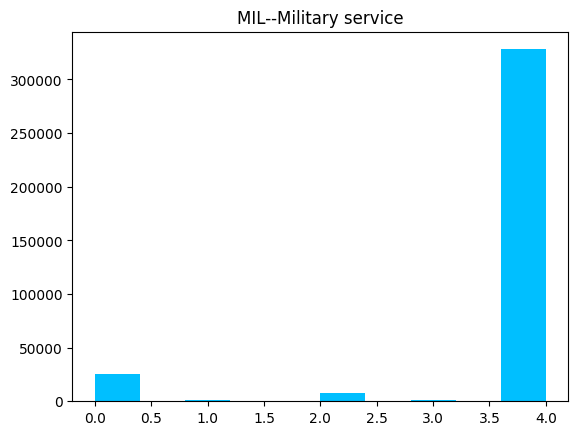

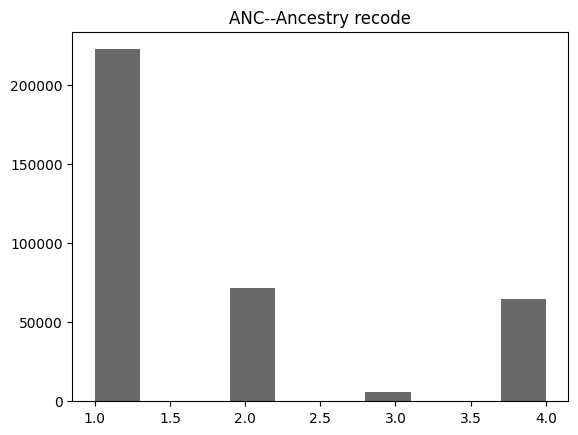

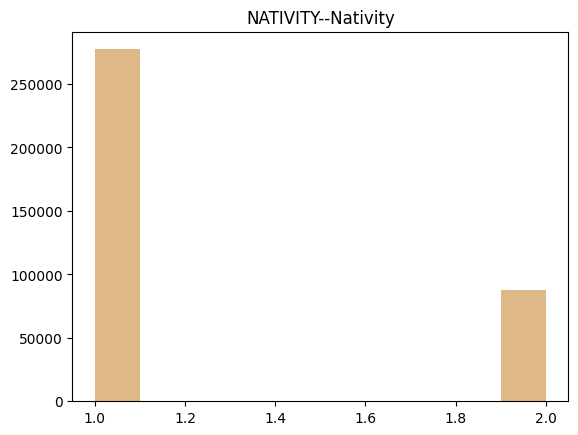

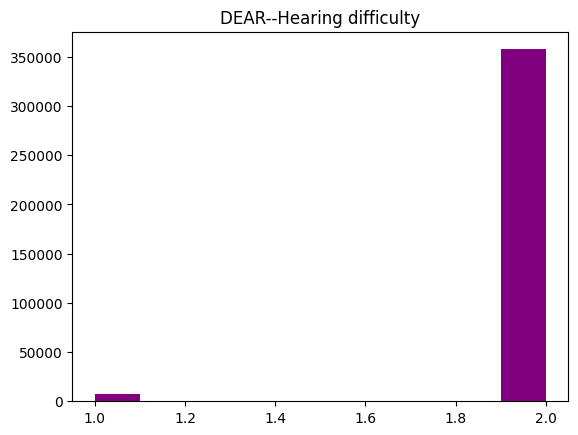

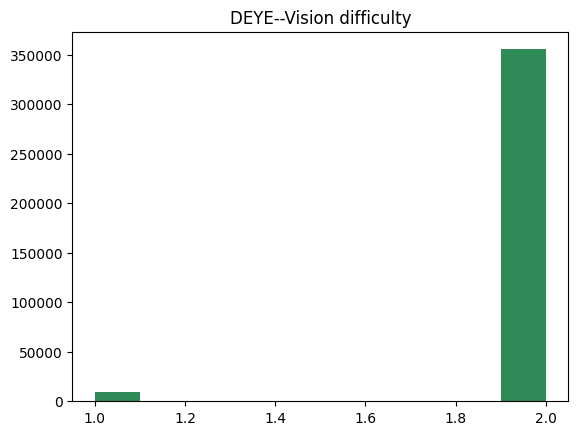

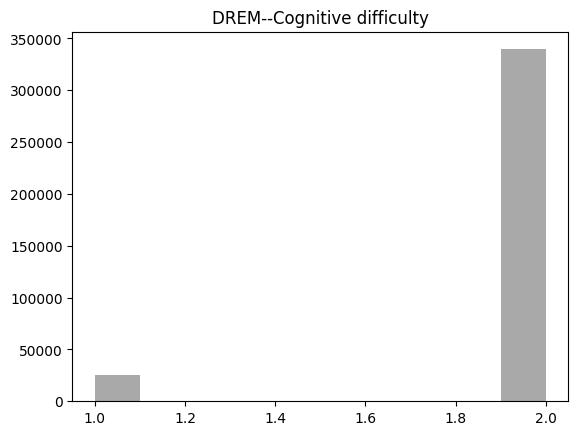

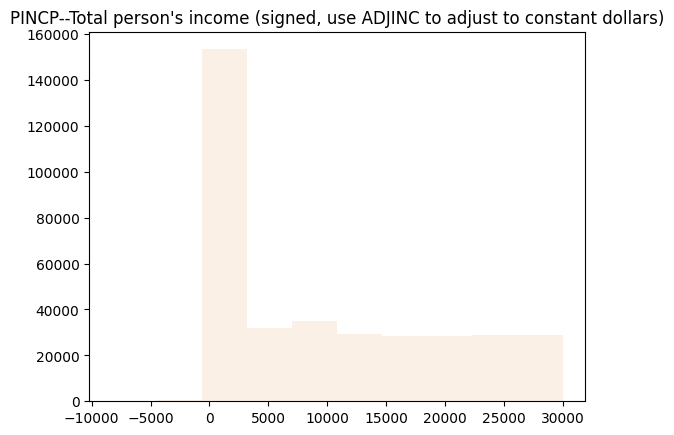

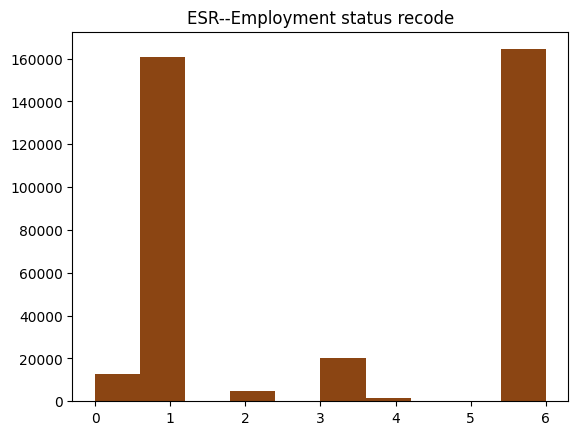

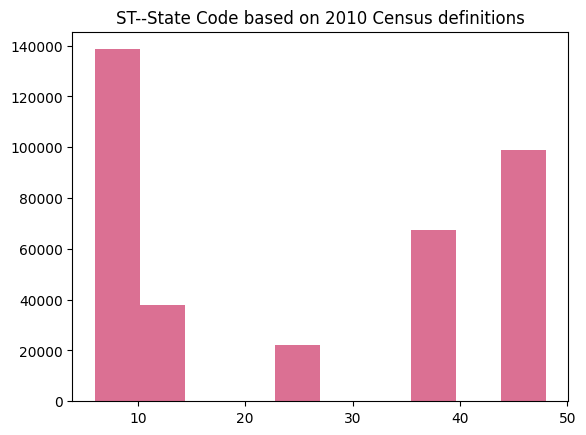

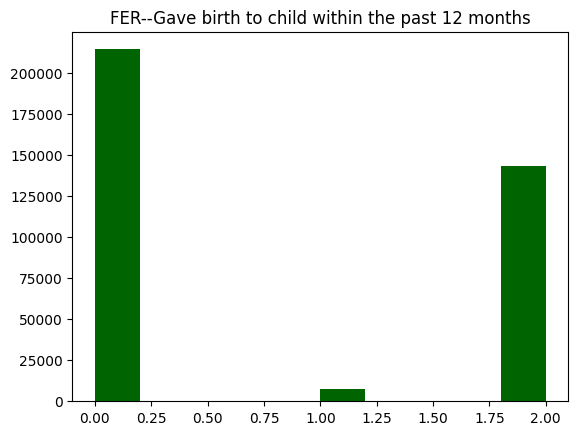

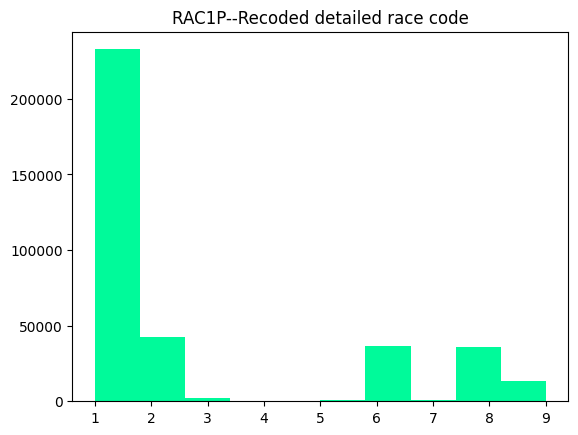

In [13]:
i = 0
used = {}
for col in features.columns:
    plt.hist(features[col],color=colors[i])
    plt.title(col+"--"+str(column_details[col]['Definition']))
    plt.show()
    used[col]=colors[i]
    i+=1
plt.show()

(array([252559.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 112167.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

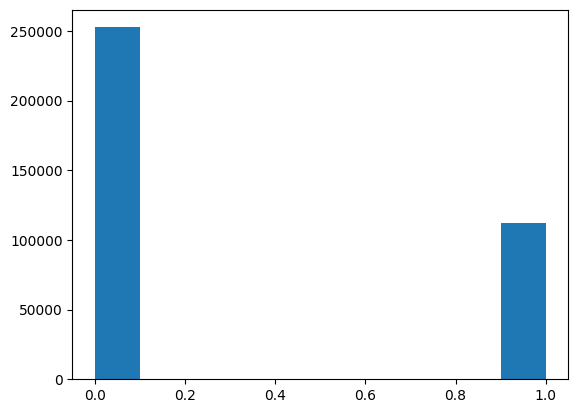

In [14]:
plt.hist(labels['PUBCOV']._recursive_cast_to_dtype(int))

### Model Training


Summary Statistics:
shape: (9, 21)
┌────────────┬───────────┬───────────┬──────────┬───┬───────────┬──────────┬──────────┬──────────┐
│ statistic  ┆ AGEP      ┆ SCHL      ┆ MAR      ┆ … ┆ ST        ┆ FER      ┆ RAC1P    ┆ label    │
│ ---        ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ---       ┆ ---      ┆ ---      ┆ ---      │
│ str        ┆ f64       ┆ f64       ┆ f64      ┆   ┆ f64       ┆ f64      ┆ f64      ┆ f64      │
╞════════════╪═══════════╪═══════════╪══════════╪═══╪═══════════╪══════════╪══════════╪══════════╡
│ count      ┆ 364726.0  ┆ 364726.0  ┆ 364726.0 ┆ … ┆ 364726.0  ┆ 364726.0 ┆ 364726.0 ┆ 364726.0 │
│ null_count ┆ 0.0       ┆ 0.0       ┆ 0.0      ┆ … ┆ 0.0       ┆ 0.0      ┆ 0.0      ┆ 0.0      │
│ mean       ┆ 35.933569 ┆ 16.554655 ┆ 3.346452 ┆ … ┆ 24.817581 ┆ 0.80549  ┆ 2.630556 ┆ 0.307538 │
│ std        ┆ 15.550484 ┆ 4.126389  ┆ 1.864167 ┆ … ┆ 17.82939  ┆ 0.970503 ┆ 2.692612 ┆ null     │
│ min        ┆ 15.0      ┆ 1.0       ┆ 1.0      ┆ … ┆ 6.0       ┆ 0.0    

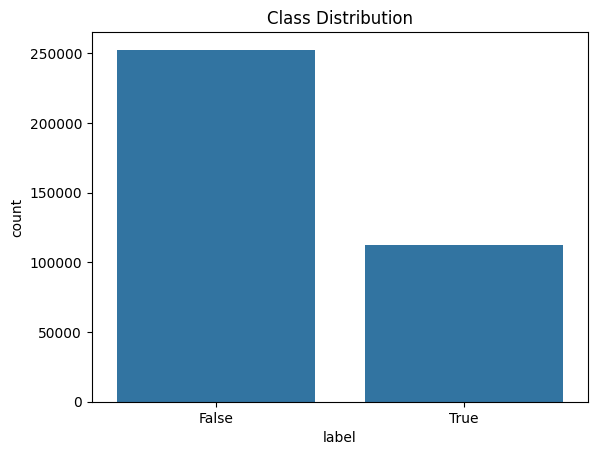

In [15]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Load Data
# features = pl.read_csv('data/multi_state_features.csv').to_pandas()
# labels = pl.read_csv("data/multi_state_labels.csv").to_pandas()

# Merge data if necessary (assuming labels has a corresponding column 'label')
data = features.clone()
label = 'PUBCOV'
data = data.with_columns(label = labels[label])

# EDA: Display basic statistics
# print("Dataset Info:")
# print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check class balance
sns.countplot(x='label', data=data)
plt.title("Class Distribution")
plt.show()

numerical_cols = data.select(pl.selectors.numeric()).columns #data.by_dtype(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
    ]
)

X = data.drop(['label'])
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [16]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def compute_fairness_metrics(y_true, y_pred, sensitive_attr):
    unique_groups = np.unique(sensitive_attr)
    results = {}
    
    for group in unique_groups:
        idx = (sensitive_attr == group)
        y_true_g = y_true[idx]
        y_pred_g = y_pred[idx]
        tn, fp, fn, tp = confusion_matrix(y_true_g, y_pred_g).ravel()
        
        TPR = tp / (tp + fn) if (tp + fn) > 0 else 0  # True Positive Rate
        FPR = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
        PPV = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value (Precision)
        NPV = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value
        
        results[group] = {
            "Demographic Parity": np.mean(y_pred_g),
            "Accuracy": accuracy_score(y_true_g, y_pred_g),
            "TPR": TPR,
            "FPR": FPR,
            "PPV": PPV,
            "NPV": NPV,
            "Disparate Mistreatment": abs((fp + fn) / len(y_true_g)),  # Error Rate Disparity
            "Equalized Odds": abs(TPR - FPR)  # Equalized Odds Calculation
        }
    
    return results

In [37]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7292106489732131
Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.91      0.82     50512
        True       0.61      0.33      0.43     22434

    accuracy                           0.73     72946
   macro avg       0.68      0.62      0.62     72946
weighted avg       0.71      0.73      0.70     72946



In [39]:
sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']
for s in sensitive_features:   
    print(s)
    print(compute_fairness_metrics(y_test.to_pandas(),y_pred,X_test[s]))
    print("----------------------------")

DIS
{np.float64(1.0): {'Demographic Parity': np.float64(0.9941842669115396), 'Accuracy': 0.6437098255280074, 'TPR': np.float64(0.998405612244898), 'FPR': np.float64(0.9866817795409465), 'PPV': np.float64(0.6426518883415435), 'NPV': np.float64(0.8245614035087719), 'Disparate Mistreatment': np.float64(0.3562901744719926), 'Equalized Odds': np.float64(0.011723832703951498)}, np.float64(2.0): {'Demographic Parity': np.float64(0.03447620555863489), 'Accuracy': 0.7424815899912899, 'TPR': np.float64(0.06428659819329291), 'FPR': np.float64(0.024221526935274462), 'PPV': np.float64(0.4772622875516766), 'NPV': np.float64(0.75195184359008), 'Disparate Mistreatment': np.float64(0.2575184100087101), 'Equalized Odds': np.float64(0.04006507125801845)}}
----------------------------
SEX
{np.float64(1.0): {'Demographic Parity': np.float64(0.1863933191008414), 'Accuracy': 0.7269245259324375, 'TPR': np.float64(0.36585365853658536), 'FPR': np.float64(0.10073744260470294), 'PPV': np.float64(0.634158665992925

In [19]:
from sklearn.svm import SVC
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(max_iter=1000))
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\shrav\Documents\Winter2025\291J\Assignments\Assignment_2\Fair-And-Transparent-ML-Models\env\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model Accuracy: 0.6717297727085789
Classification Report:
               precision    recall  f1-score   support

       False       0.69      0.95      0.80     50512
        True       0.28      0.04      0.07     22434

    accuracy                           0.67     72946
   macro avg       0.49      0.50      0.44     72946
weighted avg       0.56      0.67      0.58     72946



In [20]:
sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']
for s in sensitive_features:   
    print(s)
    print(compute_fairness_metrics(y_test.to_pandas(),y_pred,X_test[s]))
    print("----------------------------")

DIS
{np.float64(1.0): {'Demographic Parity': np.float64(0.00020406081012141618), 'Accuracy': 0.3600652994592389, 'TPR': np.float64(0.00015943877551020407), 'FPR': np.float64(0.00028336639274582036), 'PPV': np.float64(0.5), 'NPV': np.float64(0.36003673844269823), 'Disparate Mistreatment': np.float64(0.6399347005407612), 'Equalized Odds': np.float64(0.0001239276172356163)}, np.float64(2.0): {'Demographic Parity': np.float64(0.05422440414918046), 'Accuracy': 0.7201045213397735, 'TPR': np.float64(0.05915109516148991), 'FPR': np.float64(0.05252963837983952), 'PPV': np.float64(0.27920560747663553), 'NPV': np.float64(0.7453826962040153), 'Disparate Mistreatment': np.float64(0.27989547866022646), 'Equalized Odds': np.float64(0.006621456781650395)}}
----------------------------
SEX
{np.float64(1.0): {'Demographic Parity': np.float64(0.015760391812131107), 'Accuracy': 0.6683096822805475, 'TPR': np.float64(0.011077640656884656), 'FPR': np.float64(0.0179954547562729), 'PPV': np.float64(0.227091633

In [17]:
from sklearn.tree import DecisionTreeClassifier
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7228086529761741
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.81      0.80     50512
        True       0.55      0.53      0.54     22434

    accuracy                           0.72     72946
   macro avg       0.67      0.67      0.67     72946
weighted avg       0.72      0.72      0.72     72946



In [18]:
sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']
for s in sensitive_features:   
    print(s)
    print(compute_fairness_metrics(y_test.to_pandas(),y_pred,X_test[s]))
    print("----------------------------")

DIS
{np.float64(1.0): {'Demographic Parity': np.float64(0.6369758187940006), 'Accuracy': 0.7309458218549127, 'TPR': np.float64(0.787468112244898), 'FPR': np.float64(0.36950977614054975), 'PPV': np.float64(0.7911260611885311), 'NPV': np.float64(0.6253513209668353), 'Disparate Mistreatment': np.float64(0.26905417814508725), 'Equalized Odds': np.float64(0.41795833610434824)}, np.float64(2.0): {'Demographic Parity': np.float64(0.24361390450550321), 'Accuracy': 0.7215456489033177, 'TPR': np.float64(0.43193911644598443), 'FPR': np.float64(0.17883064087010195), 'PPV': np.float64(0.4538126503282845), 'NPV': np.float64(0.8077760562790502), 'Disparate Mistreatment': np.float64(0.27845435109668226), 'Equalized Odds': np.float64(0.25310847557588245)}}
----------------------------
SEX
{np.float64(1.0): {'Demographic Parity': np.float64(0.3099648373728494), 'Accuracy': 0.7248524425467788, 'TPR': np.float64(0.5538820328442329), 'FPR': np.float64(0.19354389870599695), 'PPV': np.float64(0.5773321178972

In [24]:
!pip install xgboost

  Using cached xgboost-2.1.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
!pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import lightgbm as lgb

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
lgbm_model = lgb.LGBMClassifier(random_state=42)

# Create a VotingClassifier to combine the models
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('LightGBM', lgbm_model)
], voting='soft')  # 'soft' means using probabilities for final predictions

In [ ]:
# ensemble_model = VotingClassifier(estimators=[
#     ('Random Forest', rf_bagging),
#     ('XGBoost', xgb_bagging),
#     ('LightGBM', lgbm_bagging)
# ], voting='soft')  # 'soft' means using probabilities for final predictions


In [33]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ensemble_model)
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\shrav\Documents\Winter2025\291J\Assignments\Assignment_2\Fair-And-Transparent-ML-Models\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:31:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 89733, number of negative: 202047
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 291780, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.307537 -> initscore=-0.811662
[LightGBM] [Info] Start training from score -0.811662


c:\Users\shrav\Documents\Winter2025\291J\Assignments\Assignment_2\Fair-And-Transparent-ML-Models\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Model Accuracy: 0.7890220162860198
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.92      0.86     50512
        True       0.73      0.50      0.59     22434

    accuracy                           0.79     72946
   macro avg       0.77      0.71      0.72     72946
weighted avg       0.78      0.79      0.78     72946



In [34]:
sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']
for s in sensitive_features:   
    print(s)
    print(compute_fairness_metrics(y_test.to_pandas(),y_pred,X_test[s]))
    print("----------------------------")

DIS
{np.float64(1.0): {'Demographic Parity': np.float64(0.6736047342107948), 'Accuracy': 0.8094072033465973, 'TPR': np.float64(0.8773915816326531), 'FPR': np.float64(0.31141966562765655), 'PPV': np.float64(0.8335352923356558), 'NPV': np.float64(0.7596123788683964), 'Disparate Mistreatment': np.float64(0.1905927966534027), 'Equalized Odds': np.float64(0.5659719160049965)}, np.float64(2.0): {'Demographic Parity': np.float64(0.1373980521023042), 'Accuracy': 0.7858579459973077, 'TPR': np.float64(0.35008043558965474), 'FPR': np.float64(0.06423600025541153), 'PPV': np.float64(0.6521438450899032), 'NPV': np.float64(0.8071563641704456), 'Disparate Mistreatment': np.float64(0.2141420540026922), 'Equalized Odds': np.float64(0.2858444353342432)}}
----------------------------
SEX
{np.float64(1.0): {'Demographic Parity': np.float64(0.2246640713299008), 'Accuracy': 0.7884277282431245, 'TPR': np.float64(0.5202604217277232), 'FPR': np.float64(0.0835768285329994), 'PPV': np.float64(0.7481833426495249),

### One Hot encoding

In [ ]:
def one_hot_encode(X, columns_to_encode):
    X_encoded = pd.get_dummies(X, columns=columns_to_encode, drop_first=False)
    return X_encoded

In [86]:
X_encoded = one_hot_encode(pd.DataFrame(X, columns =X.columns), ["NATIVITY", "DEAR", "DEYE", "DREM", "FER", "MIL", "MIG"])

### Dataset Intervention using Massaging

In [98]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression

def compute_discrimination_score(df, label_col, sensitive_features):
    """Compute discrimination score as the disparity in positive class rates across sensitive groups."""
    discrimination = {}
    
    for feature in sensitive_features:
        pos_rates = {val: df[df[feature] == val][label_col].mean() for val in df[feature].unique()}
        max_rate = max(pos_rates.values())
        min_rate = min(pos_rates.values())
        
        discrimination[feature] = max_rate - min_rate  # Difference in Positive Rate (DPR)
    
    return discrimination

def find_relabel_candidates(df, label_col, sensitive_features, model):
    """Identify relabeling candidates based on logistic regression decision scores."""
    decision_scores = model.decision_function(df.drop(columns=[label_col] + sensitive_features))

    promote_candidates = {feat: [] for feat in sensitive_features}
    demote_candidates = {feat: [] for feat in sensitive_features}

    for feature in sensitive_features:
        for val in df[feature].unique():
            group_df = df[df[feature] == val]
            
            # Get decision scores for each group
            scores = decision_scores[group_df.index]
            
            # Candidates: Promote (y=0 → y=1) and Demote (y=1 → y=0)
            promote = [(s, i) for s, i in zip(scores, group_df.index) if df.loc[i, label_col] == 0]
            demote = [(s, i) for s, i in zip(scores, group_df.index) if df.loc[i, label_col] == 1]

            promote_candidates[feature].extend(promote)
            demote_candidates[feature].extend(demote)

        # Sort candidates by decision scores
        promote_candidates[feature].sort(reverse=True, key=lambda x: x[0])  # Highest scores first
        demote_candidates[feature].sort(key=lambda x: x[0])  # Lowest scores first

    return promote_candidates, demote_candidates

def apply_massaging(df, label_col, sensitive_features):
    """Apply massaging based on computed M values for each sensitive feature."""
    df_copy = df.copy()

    # Train logistic regression model
    model = LogisticRegression(C=1, solver='lbfgs')
    model.fit(df.drop(columns=[label_col] + sensitive_features), df[label_col])

    # Compute discrimination scores
    discrimination = compute_discrimination_score(df, label_col, sensitive_features)

    # Find relabeling candidates
    promote_candidates, demote_candidates = find_relabel_candidates(df, label_col, sensitive_features, model)

    # Apply relabeling for each sensitive feature
    for feature in sensitive_features:
        feature_values = df[feature].unique()
        total_samples = len(df)

        # Compute M dynamically for fair relabeling
        d_feature_counts = {val: len(df[df[feature] == val]) for val in feature_values}
        max_group = max(d_feature_counts, key=lambda x: df[df[feature] == x][label_col].mean())
        min_group = min(d_feature_counts, key=lambda x: df[df[feature] == x][label_col].mean())

        d_max = d_feature_counts[max_group]
        d_min = d_feature_counts[min_group]

        M = int(discrimination[feature] * d_max * d_min / total_samples)
        print(M)

        for i in range(math.ceil(2*M)):  # Apply equal relabeling to balance the dataset
            if i < len(promote_candidates[feature]):
                df_copy.loc[promote_candidates[feature][i][1], label_col] = 1
            if i < len(demote_candidates[feature]):
                df_copy.loc[demote_candidates[feature][i][1], label_col] = 0

    return df_copy

# Example Usage
df_train = pd.DataFrame(X, columns= X.columns)
df_train['label'] = y  # Add label column

sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']
label_col = 'label'

# Apply Massaging
df_train_massaged = apply_massaging(df_train, label_col, sensitive_features)

# Extract transformed dataset
X_massaged = df_train_massaged.drop(columns=[label_col])
y_massaged = df_train_massaged[label_col]


c:\Users\shrav\Documents\Winter2025\291J\Assignments\Assignment_2\Fair-And-Transparent-ML-Models\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


16298


C:\Users\shrav\AppData\Local\Temp\ipykernel_29172\3619702374.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_copy.loc[promote_candidates[feature][i][1], label_col] = 1


2571
557
0


In [100]:
import pandas as pd

def count_sensitive_feature_pairs(X_train, y_train, sensitive_features):
    """Counts the number of occurrences for each (zᵢ, yᵢ) pair in X_train."""
    df = pd.DataFrame(X_train, columns=X_train.columns)
    df['label'] = y_train  # Add label column

    results = {}

    for feature in sensitive_features:
        counts = df.groupby([feature, 'label']).size().unstack(fill_value=0)
        results[feature] = counts

    return results

sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']

print("-----------Before Massaging--------------")
feature_counts = count_sensitive_feature_pairs(X, y, sensitive_features)
for feature, counts in feature_counts.items():
    print(f"Feature: {feature}")
    print(counts)
    print("\n")
print("---------------------------------------")
print("-----------After Massaging--------------")
feature_counts = count_sensitive_feature_pairs(X_massaged, y_massaged, sensitive_features)
for feature, counts in feature_counts.items():
    print(f"Feature: {feature}")
    print(counts)
    print("\n")


-----------Before Massaging--------------
Feature: DIS
label   False  True 
DIS                 
1.0     17732  31412
2.0    234827  80755


Feature: SEX
label   False  True 
SEX                 
1.0    107252  51347
2.0    145307  60820


Feature: MAR
label   False  True 
MAR                 
1.0    100017  31221
2.0      2714   2879
3.0     14290  12309
4.0      4473   3690
5.0    131065  62068


Feature: RAC1P
label   False  True 
RAC1P               
1.0    167374  65294
2.0     25887  16897
3.0      1240    815
4.0        17     14
5.0       541    345
6.0     26166  10078
7.0       485    205
8.0     22048  14081
9.0      8801   4438


---------------------------------------
-----------After Massaging--------------
Feature: DIS
label   False      1
DIS                 
1.0     16958  32186
2.0    235601  79981


Feature: SEX
label   False      1
SEX                 
1.0    107134  51465
2.0    145425  60702


Feature: MAR
label   False      1
MAR                 
1.0     93490  3

In [101]:
df_train = pd.DataFrame(X_encoded, columns= X_encoded.columns)
df_train['label'] = y  # Add label column

sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']
label_col = 'label'

# Apply Massaging
df_train_massaged = apply_massaging(df_train, label_col, sensitive_features)

# Extract transformed dataset
X_massaged = df_train_massaged.drop(columns=[label_col])
y_massaged = df_train_massaged[label_col]

c:\Users\shrav\Documents\Winter2025\291J\Assignments\Assignment_2\Fair-And-Transparent-ML-Models\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


16298


C:\Users\shrav\AppData\Local\Temp\ipykernel_29172\3619702374.py:78: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_copy.loc[promote_candidates[feature][i][1], label_col] = 1


2571
557
0


In [102]:
print("-----------Before Massaging--------------")
feature_counts = count_sensitive_feature_pairs(X_encoded, y, sensitive_features)
for feature, counts in feature_counts.items():
    print(f"Feature: {feature}")
    print(counts)
    print("\n")
print("---------------------------------------")
print("-----------After Massaging--------------")
feature_counts = count_sensitive_feature_pairs(X_massaged, y_massaged, sensitive_features)
for feature, counts in feature_counts.items():
    print(f"Feature: {feature}")
    print(counts)
    print("\n")

-----------Before Massaging--------------
Feature: DIS
label   False  True 
DIS                 
1.0     17732  31412
2.0    234827  80755


Feature: SEX
label   False  True 
SEX                 
1.0    107252  51347
2.0    145307  60820


Feature: MAR
label   False  True 
MAR                 
1.0    100017  31221
2.0      2714   2879
3.0     14290  12309
4.0      4473   3690
5.0    131065  62068


Feature: RAC1P
label   False  True 
RAC1P               
1.0    167374  65294
2.0     25887  16897
3.0      1240    815
4.0        17     14
5.0       541    345
6.0     26166  10078
7.0       485    205
8.0     22048  14081
9.0      8801   4438


---------------------------------------
-----------After Massaging--------------
Feature: DIS
label   False      1
DIS                 
1.0     16820  32324
2.0    235739  79843


Feature: SEX
label   False      1
SEX                 
1.0    107192  51407
2.0    145367  60760


Feature: MAR
label   False      1
MAR                 
1.0     93325  3

### Training On massaged Dataset

In [103]:
X_massaged = data.drop(['label'])
y_massaged = data['label']

In [104]:
X_train_massaged, X_test_massaged, y_train_massaged, y_test_massaged = train_test_split(X_massaged, y_massaged, test_size=0.2, random_state=42, stratify=y_massaged)

In [105]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

model_pipeline.fit(X_train_massaged, y_train_massaged)

y_pred_massaged = model_pipeline.predict(X_test_massaged)
print("Model Accuracy:", accuracy_score(y_test_massaged, y_pred_massaged))
print("Classification Report:\n", classification_report(y_test_massaged, y_pred_massaged))
sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']
for s in sensitive_features:   
    print(s)
    print(compute_fairness_metrics(y_test_massaged.to_pandas(),y_pred_massaged,X_test_massaged[s]))
    print("----------------------------")


Model Accuracy: 0.7715844597373399
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.88      0.84     50512
        True       0.66      0.52      0.58     22434

    accuracy                           0.77     72946
   macro avg       0.73      0.70      0.71     72946
weighted avg       0.76      0.77      0.76     72946

DIS
{np.float64(1.0): {'Demographic Parity': np.float64(0.6691153963881237), 'Accuracy': 0.8006325885113764, 'TPR': np.float64(0.8670280612244898), 'FPR': np.float64(0.3173703598753188), 'PPV': np.float64(0.8292162244586764), 'NPV': np.float64(0.7428307123034228), 'Disparate Mistreatment': np.float64(0.1993674114886236), 'Equalized Odds': np.float64(0.549657701349171)}, np.float64(2.0): {'Demographic Parity': np.float64(0.17499406128751288), 'Accuracy': 0.7670757779713359, 'TPR': np.float64(0.38683331270882315), 'FPR': np.float64(0.10212204414362641), 'PPV': np.float64(0.56579185520362), 'NPV': np.float64(0

In [75]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']
for s in sensitive_features:   
    print(s)
    print(compute_fairness_metrics(y_test.to_pandas(),y_pred,X_test[s]))
    print("----------------------------")


Model Accuracy: 0.771995722863488
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.88      0.84     50512
        True       0.66      0.52      0.58     22434

    accuracy                           0.77     72946
   macro avg       0.74      0.70      0.71     72946
weighted avg       0.76      0.77      0.76     72946

DIS
{np.float64(1.0): {'Demographic Parity': np.float64(0.6657483930211203), 'Accuracy': 0.7999183756759515, 'TPR': np.float64(0.8638392857142857), 'FPR': np.float64(0.3136865967696231), 'PPV': np.float64(0.8303448275862069), 'NPV': np.float64(0.7393162393162394), 'Disparate Mistreatment': np.float64(0.20008162432404858), 'Equalized Odds': np.float64(0.5501526889446626)}, np.float64(2.0): {'Demographic Parity': np.float64(0.17592841871882176), 'Accuracy': 0.767661730936733, 'TPR': np.float64(0.3898032421729984), 'FPR': np.float64(0.10235617138113785), 'PPV': np.float64(0.5671077504725898), 'NPV': np.float64(

### With one hot massaged dataset

In [84]:
X_massaged = data.drop(['label'])
y_massaged = data['label']
X_train_massaged, X_test_massaged, y_train_massaged, y_test_massaged = train_test_split(X_massaged, y_massaged, test_size=0.2, random_state=42, stratify=y_massaged)

In [85]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

model_pipeline.fit(X_train_massaged, y_train_massaged)

y_pred_massaged = model_pipeline.predict(X_test_massaged)
print("Model Accuracy:", accuracy_score(y_test_massaged, y_pred_massaged))
print("Classification Report:\n", classification_report(y_test_massaged, y_pred_massaged))
sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']
for s in sensitive_features:   
    print(s)
    print(compute_fairness_metrics(y_test_massaged.to_pandas(),y_pred_massaged,X_test_massaged[s]))
    print("----------------------------")


Model Accuracy: 0.7715433334247251
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.88      0.84     50512
        True       0.66      0.52      0.58     22434

    accuracy                           0.77     72946
   macro avg       0.73      0.70      0.71     72946
weighted avg       0.76      0.77      0.76     72946

DIS
{np.float64(1.0): {'Demographic Parity': np.float64(0.6663605754514845), 'Accuracy': 0.7984899500051015, 'TPR': np.float64(0.8632015306122449), 'FPR': np.float64(0.31652026069708133), 'PPV': np.float64(0.8289695299341602), 'NPV': np.float64(0.7376146788990826), 'Disparate Mistreatment': np.float64(0.2015100499948985), 'Equalized Odds': np.float64(0.5466812699151635)}, np.float64(2.0): {'Demographic Parity': np.float64(0.17496238815424817), 'Accuracy': 0.7673608361707182, 'TPR': np.float64(0.38732830095285237), 'FPR': np.float64(0.1019092012004342), 'PPV': np.float64(0.5666183924692252), 'NPV': np.float6

### Post Model Intervention

In [106]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']
for s in sensitive_features:   
    print(s)
    print(compute_fairness_metrics(y_test.to_pandas(),y_pred,X_test[s]))
    print("----------------------------")


Model Accuracy: 0.7396430236065035
Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.93      0.83     50512
        True       0.67      0.31      0.42     22434

    accuracy                           0.74     72946
   macro avg       0.71      0.62      0.63     72946
weighted avg       0.73      0.74      0.71     72946

DIS
{np.float64(1.0): {'Demographic Parity': np.float64(0.8177736965615754), 'Accuracy': 0.6956433017039078, 'TPR': np.float64(0.9011479591836735), 'FPR': np.float64(0.6695947860583735), 'PPV': np.float64(0.7051777916406737), 'NPV': np.float64(0.6528555431131019), 'Disparate Mistreatment': np.float64(0.30435669829609224), 'Equalized Odds': np.float64(0.2315531731253)}, np.float64(2.0): {'Demographic Parity': np.float64(0.036091535355135006), 'Accuracy': 0.7464724047826431, 'TPR': np.float64(0.07523821309243905), 'FPR': np.float64(0.022625204861332824), 'PPV': np.float64(0.5335673541026766), 'NPV': np.float6

In [126]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])
model_pipeline.fit(X_train, y_train)
y_prob = model_pipeline.predict_proba(X_test)[:, 1]
sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']
y_pred = model_pipeline.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(compute_fairness_metrics(y_test.to_pandas(), y_pred, X_test[s]))
print("----------------------------")
# sensitive_features = ['SEX']

for s in sensitive_features:
    print(f"\nEvaluating fairness for sensitive attribute: {s}")
    unique_values = X_test[s].unique()
    # thresholds = {z: np.median(y_prob[X_test[s] == z]) for z in unique_values}
    thresholds = {z: np.percentile(y_prob[X_test[s] == z], 60) for z in unique_values}

    # print(thresholds)
    thresholds = {z: 0.5 for z in unique_values}

    # Generate predictions based on group-specific thresholds
    y_pred_thresh = np.zeros_like(y_prob)
    
    for z in unique_values:
        threshold = thresholds[z]
        y_pred_thresh[X_test[s] == z] = (y_prob[X_test[s] == z] >= threshold).astype(int)
    
    # Compute performance metrics
    print("Model Accuracy:", accuracy_score(y_test, y_pred_thresh))
    print("Classification Report:\n", classification_report(y_test, y_pred_thresh))

    # Compute fairness metrics
    print(compute_fairness_metrics(y_test.to_pandas(), y_pred_thresh, X_test[s]))
    print("----------------------------")


Model Accuracy: 0.7396430236065035
Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.93      0.83     50512
        True       0.67      0.31      0.42     22434

    accuracy                           0.74     72946
   macro avg       0.71      0.62      0.63     72946
weighted avg       0.73      0.74      0.71     72946

{np.float64(1.0): {'Demographic Parity': np.float64(0.1280541527882239), 'Accuracy': 0.7656602557215, 'TPR': np.float64(0.3102072141212586), 'FPR': np.float64(0.05721534099388151), 'PPV': np.float64(0.6783017284779326), 'NPV': np.float64(0.7784897476340694), 'Disparate Mistreatment': np.float64(0.23433974427850005), 'Equalized Odds': np.float64(0.25299187312737714)}, np.float64(2.0): {'Demographic Parity': np.float64(0.19665222989582115), 'Accuracy': 0.6929650005852745, 'TPR': np.float64(0.3616896450572015), 'FPR': np.float64(0.08706661472536034), 'PPV': np.float64(0.7339285714285714), 'NPV': np.float64(0.6

In [125]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])  
model_pipeline.fit(X_train, y_train)
y_prob = model_pipeline.predict_proba(X_test)[:, 1]
sensitive_features = ['DIS', 'SEX', 'MAR', 'RAC1P']
# sensitive_features = ['SEX']
y_pred = model_pipeline.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(compute_fairness_metrics(y_test.to_pandas(), y_pred, X_test[s]))
print("----------------------------")

for s in sensitive_features:
    print(f"\nEvaluating fairness for sensitive attribute: {s}")
    unique_values = X_test[s].unique()
    # thresholds = {z: np.median(y_prob[X_test[s] == z]) for z in unique_values}
    thresholds = {z: np.percentile(y_prob[X_test[s] == z], 60) for z in unique_values}


    # print(thresholds)
    # thresholds = {z: 0.5 for z in unique_values}

    # Generate predictions based on group-specific thresholds
    y_pred_thresh = np.zeros_like(y_prob)
    
    for z in unique_values:
        threshold = thresholds[z]
        y_pred_thresh[X_test[s] == z] = (y_prob[X_test[s] == z] >= threshold).astype(int)
    
    # Compute performance metrics
    print("Model Accuracy:", accuracy_score(y_test, y_pred_thresh))
    print("Classification Report:\n", classification_report(y_test, y_pred_thresh))

    # Compute fairness metrics
    print(compute_fairness_metrics(y_test.to_pandas(), y_pred_thresh, X_test[s]))
    print("----------------------------")


c:\Users\shrav\Documents\Winter2025\291J\Assignments\Assignment_2\Fair-And-Transparent-ML-Models\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:40:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.7858278726729362
Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.92      0.86     50512
        True       0.72      0.49      0.59     22434

    accuracy                           0.79     72946
   macro avg       0.76      0.70      0.72     72946
weighted avg       0.78      0.79      0.77     72946

{np.float64(1.0): {'Demographic Parity': np.float64(0.18375416353282475), 'Accuracy': 0.805458257225744, 'TPR': np.float64(0.4807367613200307), 'FPR': np.float64(0.06825846888524101), 'PPV': np.float64(0.732545901064203), 'NPV': np.float64(0.8218723673125526), 'Disparate Mistreatment': np.float64(0.19454174277425593), 'Equalized Odds': np.float64(0.4124782924347897)}, np.float64(2.0): {'Demographic Parity': np.float64(0.3386398220765539), 'Accuracy': 0.7686995200749152, 'TPR': np.float64(0.6344969199178645), 'FPR': np.float64(0.14218932606155044), 'PPV': np.float64(0.7476667818873142), 'NPV': np.float64(0.7

### Dataset 2

Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release ', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype', 'Release Type',
       'Part of Target Population', 'Main Supervising District',
       'Recidivism - Return to Prison', 'Release Type.1', 'Days to Recidivism',
       'New Conviction Offense Classification', 'New Conviction Offense Type',
       'New Conviction Offense Sub Type'],
      dtype='object')


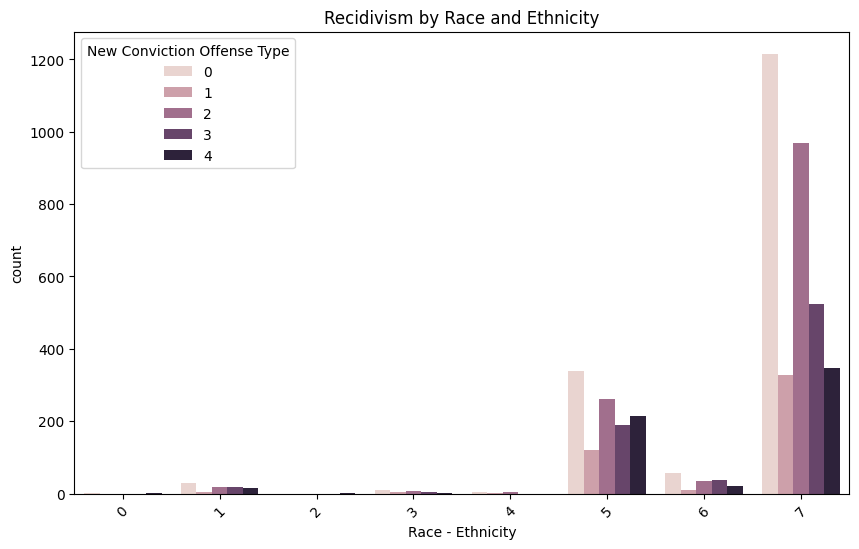

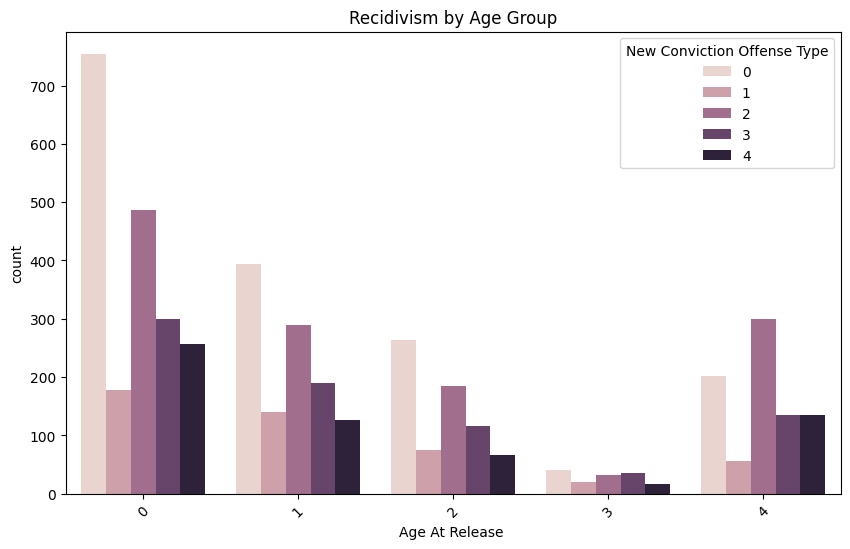

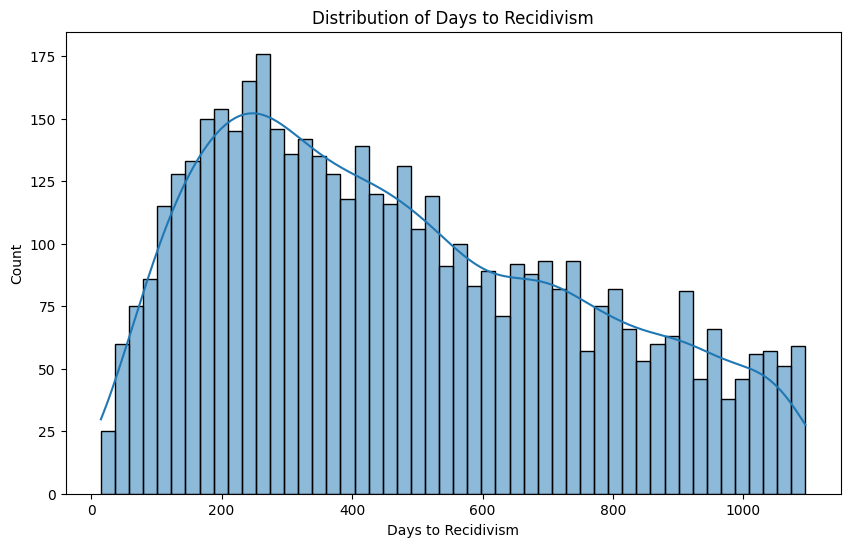

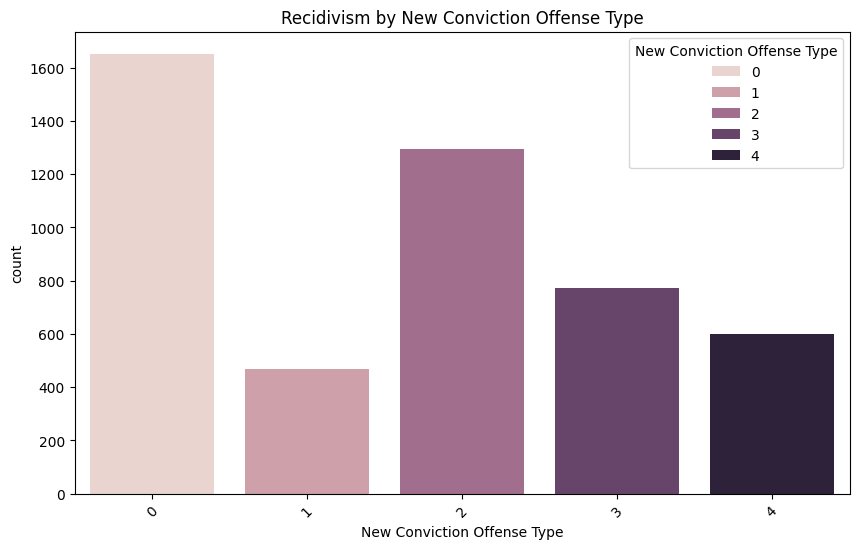

Model Accuracy: 0.5824634655532359
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.75       331
           1       0.79      0.47      0.59        93
           2       0.50      0.52      0.51       259
           3       0.43      0.28      0.34       155
           4       0.48      0.48      0.48       120

    accuracy                           0.58       958
   macro avg       0.57      0.52      0.53       958
weighted avg       0.57      0.58      0.57       958



In [26]:
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv("prison_recidivists_with_recidivism_type_only.csv")
data = data.dropna()
print(data.columns)
# Convert categorical columns to category type
categorical_cols = [
    "Fiscal Year Released", "Recidivism Reporting Year", "Race - Ethnicity", "Age At Release ",
    "Convicting Offense Classification", "Convicting Offense Type", "Convicting Offense Subtype",
    "Release Type", "Part of Target Population", "Main Supervising District", "Recidivism - Return to Prison",
    "New Conviction Offense Classification", "New Conviction Offense Type", "New Conviction Offense Sub Type"
]
data[categorical_cols] = data[categorical_cols].astype('category')

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define the target variable for fairness analysis
target_col = "New Conviction Offense Type"  # Fairness evaluation based on likelihood of reoffending
X = data.drop(columns=[target_col])
y = data[target_col]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns.tolist()),
        ('cat', OneHotEncoder(handle_unknown='ignore'), X.select_dtypes(include=['category']).columns.tolist())
    ]
)

# Data Visualization
plt.figure(figsize=(10,6))
sns.countplot(x="Race - Ethnicity", hue=target_col, data=data)
plt.title("Recidivism by Race and Ethnicity")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x="Age At Release ", hue=target_col, data=data)
plt.title("Recidivism by Age Group")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data["Days to Recidivism"], bins=50, kde=True)
plt.title("Distribution of Days to Recidivism")
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x="New Conviction Offense Type", hue=target_col, data=data)
plt.title("Recidivism by New Conviction Offense Type")
plt.xticks(rotation=45)
plt.show()

# Model Pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train Model
model_pipeline.fit(X_train, y_train)

# Evaluate Model
y_pred = model_pipeline.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
